In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [15]:
target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [4]:
# Load Iris Data
iris_data = load_iris()
features = iris_data.data
feature_names = iris_data.feature_names
target = iris_data.target
target_names = iris_data.target_names

In [14]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
range(3, 10, 2)

range(3, 10, 2)

In [6]:
def build_knn(features, target, **param_grid):
    est = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring="accuracy")
    est.fit(features, target)
    return est

In [7]:
knn_est = build_knn(features, target, n_neighbors=list(range(3, 10, 2)))

In [8]:
knn_est.best_score_

0.97999999999999998

In [9]:
iris_df = pd.DataFrame(features, columns=feature_names)
iris_df.rename(columns={
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width"
    }, inplace=True)
iris_df["target"] = target
iris_df["flower"] = iris_df["target"].map(lambda val: target_names[val])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

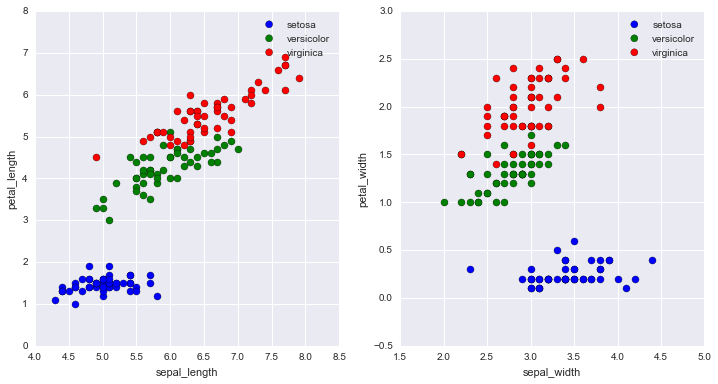

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for idx, (x_col, y_col) in enumerate([("sepal_length", "petal_length"), ("sepal_width", "petal_width")]):
    for color, label in zip('bgr', target_names):
        subset = iris_df[iris_df.flower == label]
        ax.flat[idx].scatter(subset[x_col], subset[y_col], s=50, c=color, label=label)
        ax.flat[idx].set_xlabel(x_col)
        ax.flat[idx].set_ylabel(y_col)
        ax.flat[idx].legend()
# plt.savefig()